In [1]:
#pip install --upgrade pandas

In [2]:
#pip install plotting

In [3]:
#pip install ggplot

In [4]:
#pip install fancyimpute

In [5]:

import pandas as pd
bank=pd.read_csv('C:/Users/saigo/Desktop/s/bank-loan.csv')
print(bank.head(5))
bank.head(5).describe()

   age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608      1.0
1   27   1      10        6      31     17.3   1.362202  4.000798      0.0
2   40   1      15       14      55      5.5   0.856075  2.168925      0.0
3   41   1      15       14     120      2.9   2.658720  0.821280      0.0
4   24   2       2        0      28     17.3   1.787436  3.056564      1.0


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,34.60000,1.600000,11.800000,9.20000,82.000000,10.460000,3.604765,3.011235,0.400000
std,8.38451,0.894427,6.058052,6.09918,64.276745,6.645901,4.385097,1.618346,0.547723
min,24.00000,1.000000,2.000000,0.00000,28.000000,2.900000,0.856075,0.821280,0.000000
25%,27.00000,1.000000,10.000000,6.00000,31.000000,5.500000,1.362202,2.168925,0.000000
50%,40.00000,1.000000,15.000000,12.00000,55.000000,9.300000,1.787436,3.056564,0.000000
75%,41.00000,2.000000,15.000000,14.00000,120.000000,17.300000,2.658720,4.000798,1.000000
max,41.00000,3.000000,17.000000,14.00000,176.000000,17.300000,11.359392,5.008608,1.000000


In [6]:
bank.rename(columns = {'default':'result'}, inplace = True)


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from fancyimpute import KNN  

In [8]:
columns=list (bank.columns)
columns

['age',
 'ed',
 'employ',
 'address',
 'income',
 'debtinc',
 'creddebt',
 'othdebt',
 'result']

In [9]:
bank.tail(5)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,result
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN
849,37,1,20,13,41,12.9,0.899130,4.389870,NaN


In [10]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   result    700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [11]:
bank.shape

(850, 9)

In [12]:
bank.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,result
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


C:\Users\saigo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age', ylabel='count'>

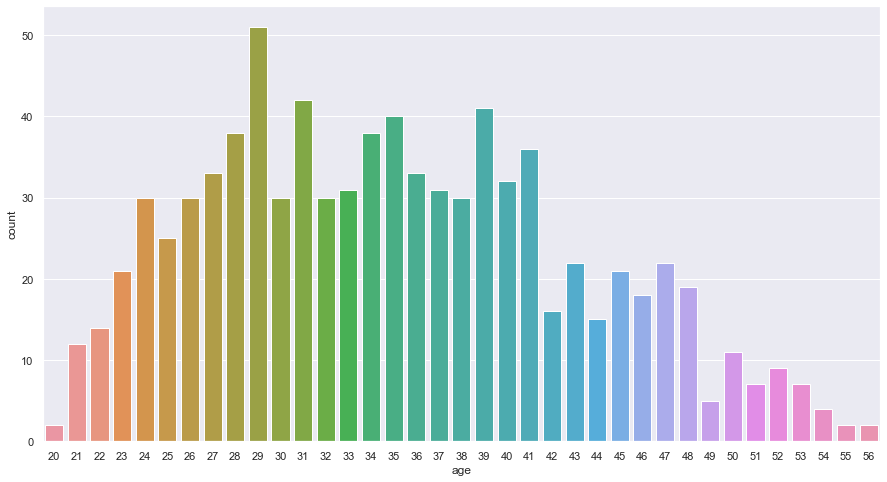

In [13]:
############ univariate analysis and bivariate analysis ##########################

#Analysis for single variable in the dataset is Univariate Analysis and plotting relation between 2 variables is bivariate analysis.
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(bank["age"])
# age_20 = bank[bank["age"] == 20]
# print()

In [14]:

# it means there are missing values in var

bank['result'].unique()

array([ 1.,  0., nan])

In [15]:
bank['result'].value_counts()

0.0    517
1.0    183
Name: result, dtype: int64

In [16]:
(850-517-183) # nan values

150

In [17]:
columns

['age',
 'ed',
 'employ',
 'address',
 'income',
 'debtinc',
 'creddebt',
 'othdebt',
 'result']

In [18]:
# replacing nan values with 0 in each and every column
for i in columns:
  bank[i] = bank[i].fillna(0)


In [19]:
columns[0]

'age'

<AxesSubplot:xlabel='result', ylabel='count'>

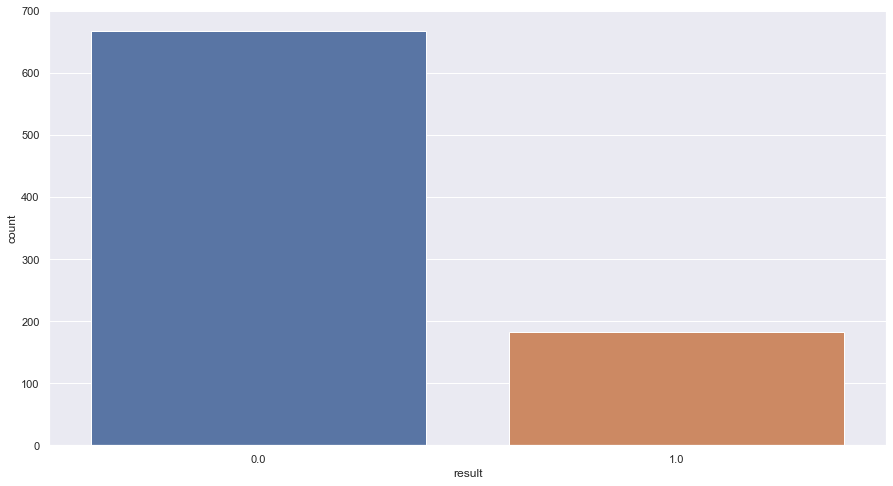

In [20]:
sns.countplot( x = "result" , data = bank,)

<AxesSubplot:xlabel='ed', ylabel='count'>

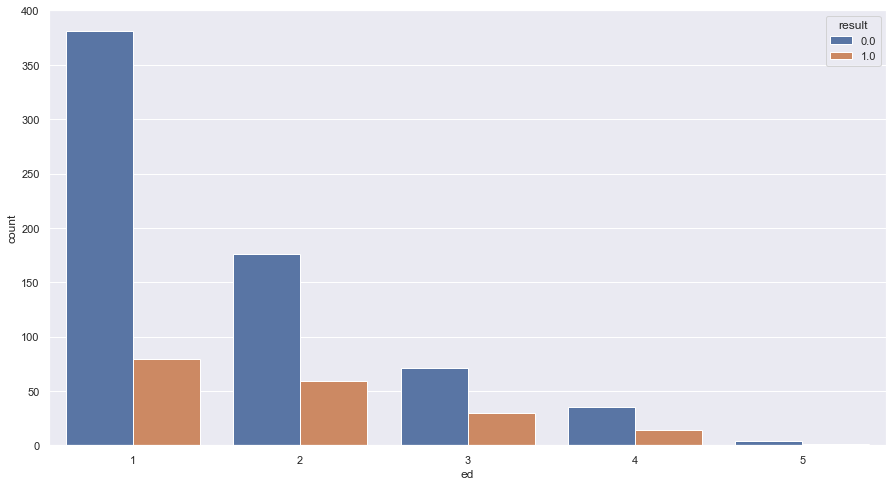

In [21]:
sns.countplot( x = "ed" , data = bank, hue = "result")


## Outliers Analysis and Synthesis


In [22]:
print(bank.head())
bank.describe()

   age  ed  employ  address  income  debtinc   creddebt   othdebt  result
0   41   3      17       12     176      9.3  11.359392  5.008608     1.0
1   27   1      10        6      31     17.3   1.362202  4.000798     0.0
2   40   1      15       14      55      5.5   0.856075  2.168925     0.0
3   41   1      15       14     120      2.9   2.658720  0.821280     0.0
4   24   2       2        0      28     17.3   1.787436  3.056564     1.0


,age,ed,employ,address,income,debtinc,creddebt,othdebt,result
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.215294
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.411268
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,0.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


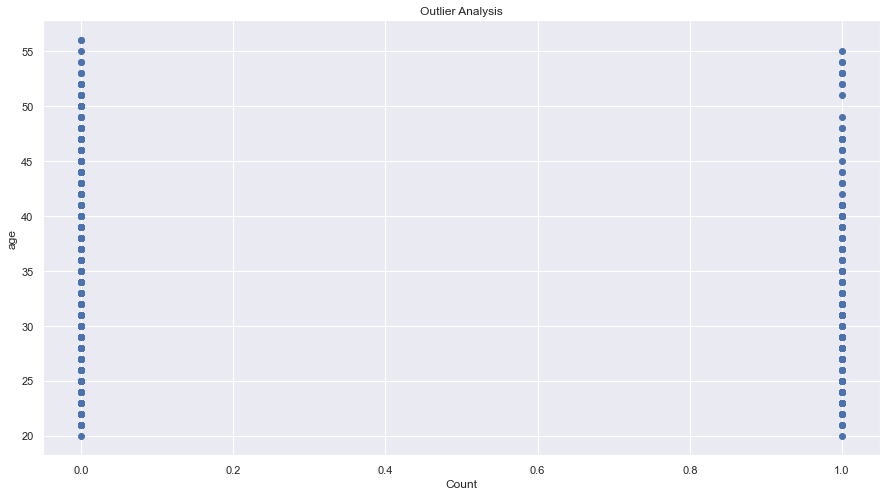

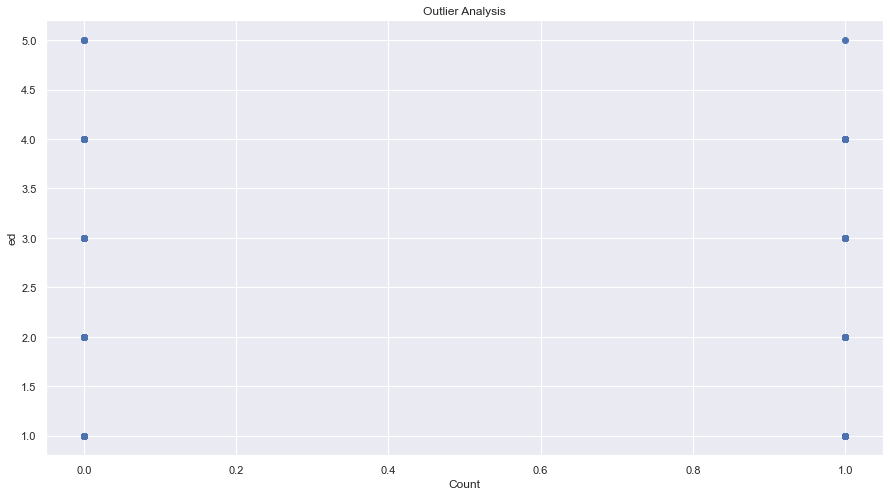

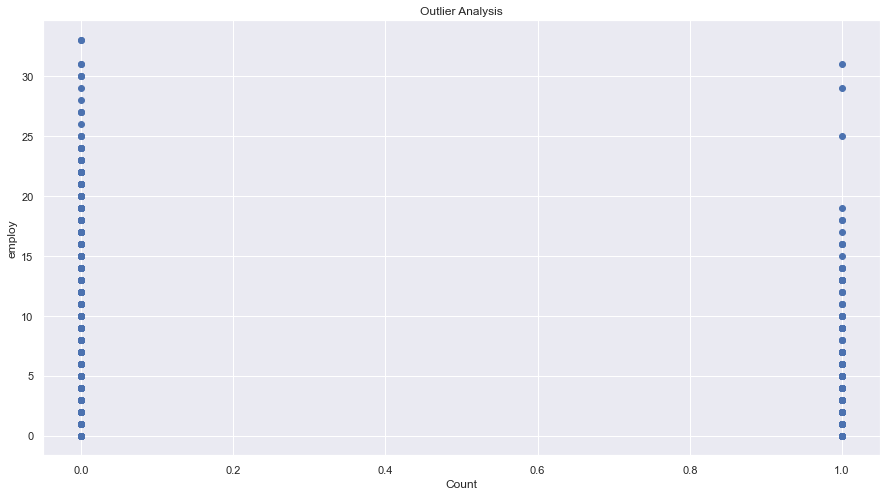

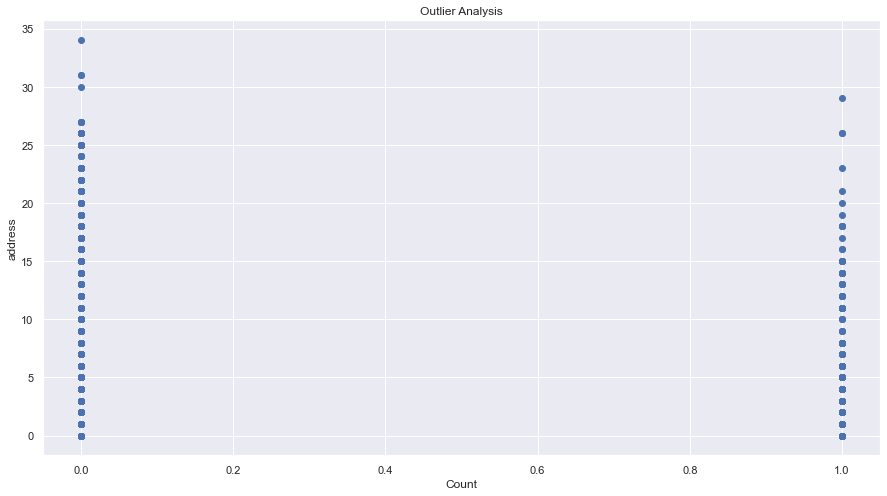

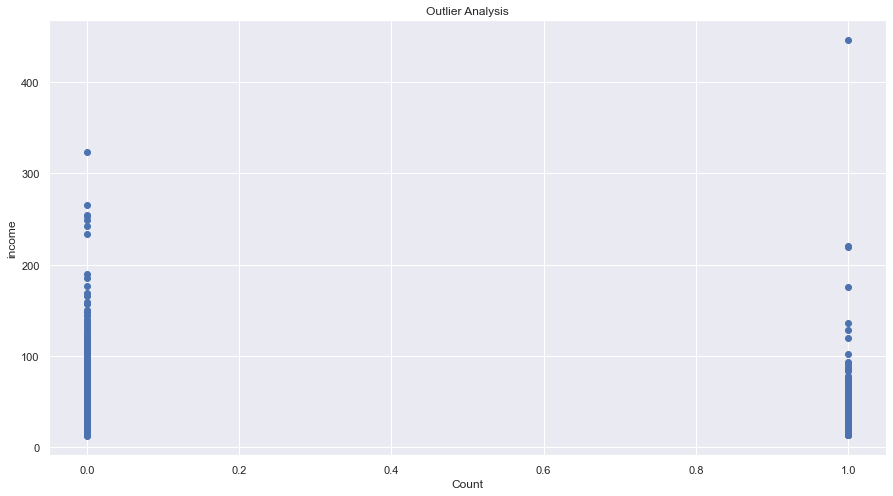

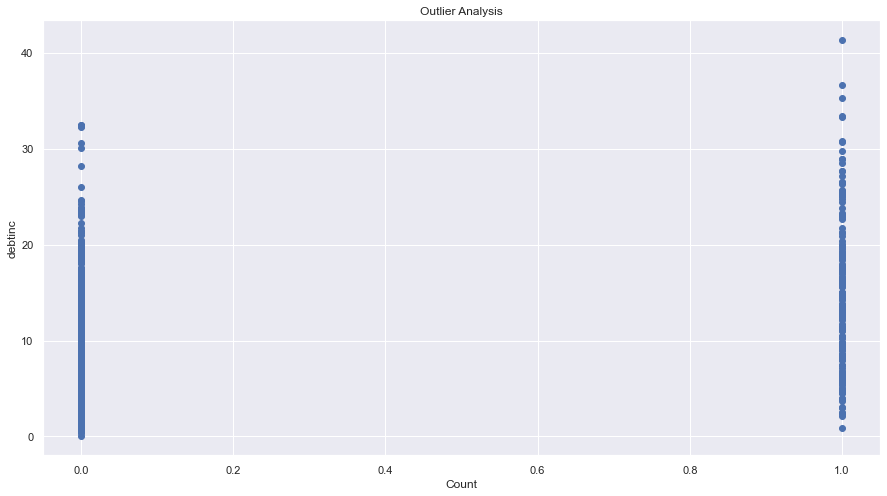

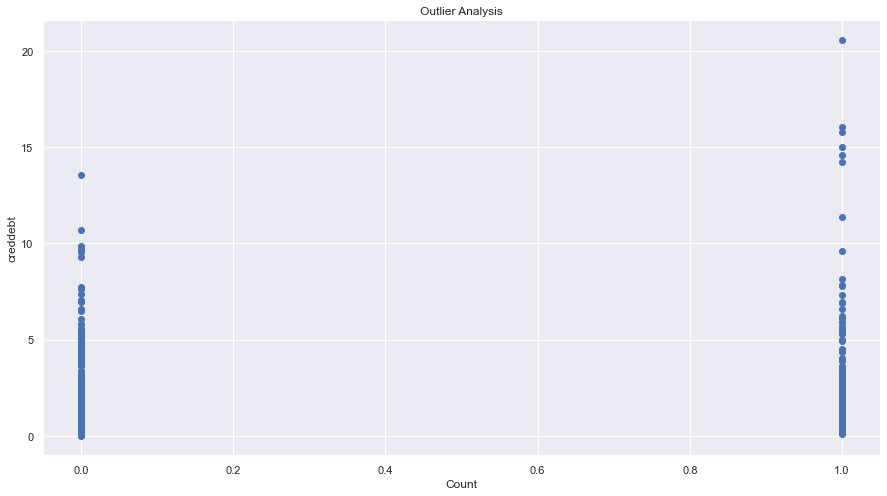

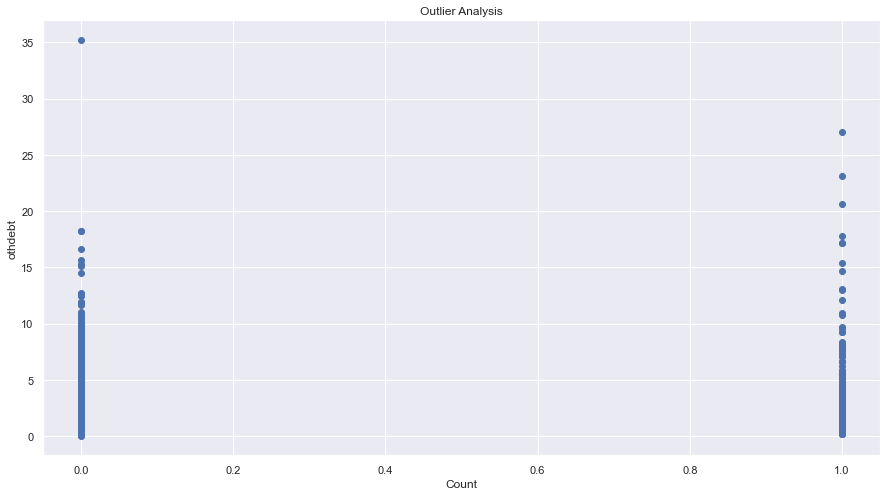

In [23]:
#scatter plot for outlier Analysis
for i in columns:
  if i!='result':
    plt.scatter(bank['result'],bank[i])
    plt.title('Outlier Analysis')
    plt.xlabel('Count')
    plt.ylabel(i)
    plt.show()

In [24]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   result    850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


# Now detect and replace Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1bdfca0c588>,
 'caps': [<matplotlib.lines.Line2D at 0x1bdfca20fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bdfc9eeac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1bdfc9ae8c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bdfc9ae688>],
 'means': []}

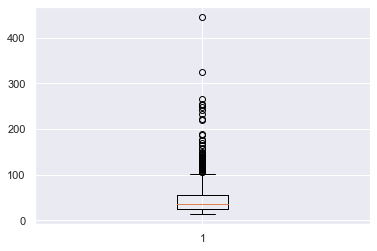

In [25]:
    
%matplotlib inline

plt.boxplot(bank['income'])  

In [26]:
# 2.Detect outliers and replace  NAn later impute by KNN imputation

#Extract quartiles
q75, q25 = np.percentile(bank['income'], [75 ,25])

#Calculate IQR
iqr = q75 - q25

#Calculate inner and outer fence
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

#Replace with NA
bank.loc[bank['income']  < minimum,:'income'] = np.nan

bank.loc[bank['income'] > maximum,:'income'] = np.nan

#Calculate missing value
bank.income.isnull().sum()

# missing_val = pd.DataFrame(bank.isnull().sum())

53

In [27]:
#replacing NaNs with Knn imputation
bank = pd.DataFrame(KNN(k = 3).fit_transform(bank), columns = bank.columns)


Imputing row 1/850 with 5 missing, elapsed time: 0.293
Imputing row 101/850 with 5 missing, elapsed time: 0.293
Imputing row 201/850 with 0 missing, elapsed time: 0.299
Imputing row 301/850 with 5 missing, elapsed time: 0.301
Imputing row 401/850 with 0 missing, elapsed time: 0.301
Imputing row 501/850 with 0 missing, elapsed time: 0.301
Imputing row 601/850 with 0 missing, elapsed time: 0.310
Imputing row 701/850 with 0 missing, elapsed time: 0.314
Imputing row 801/850 with 0 missing, elapsed time: 0.314


In [28]:
bank.result.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1bdfc03b0c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1bdfbf70808>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bdfbf73348>],
 'medians': [<matplotlib.lines.Line2D at 0x1bdfbf70ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bdfbf70bc8>],
 'means': []}

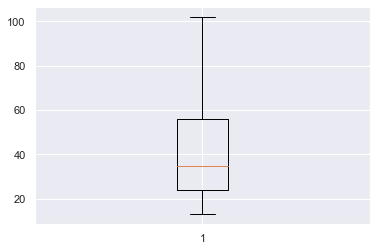

In [29]:
    ## Now check outliers got imputed or not 
%matplotlib inline

plt.boxplot(bank['income']) 

As of now we got data having zero missing values and Outliers

# Next step = Feature Selection

#### Selection of categorical vars -- Chi_Sqr Test of Independance

#### Selection of Numerical vars i.e. ( cnames ) --  Correlation analysis 


In [30]:
cnames=['age',	'employ'	,'address',	'income'	,'debtinc'	,'creddebt',	'othdebt']

In [31]:
df_corr = bank.loc[:,cnames]
df_corr

,age,employ,address,income,debtinc,creddebt,othdebt
0,32.356193,7.236156,2.601503,89.801565,9.3,11.359392,5.008608
1,27.000000,10.000000,6.000000,31.000000,17.3,1.362202,4.000798
2,40.000000,15.000000,14.000000,55.000000,5.5,0.856075,2.168925
3,45.812528,17.114644,16.862865,82.601082,2.9,2.658720,0.821280
4,24.000000,2.000000,0.000000,28.000000,17.3,1.787436,3.056564
...,...,...,...,...,...,...,...
845,34.000000,12.000000,15.000000,32.000000,2.7,0.239328,0.624672
846,40.556120,17.662846,7.265821,89.968082,5.7,4.026708,2.585292
847,48.000000,13.000000,11.000000,38.000000,10.8,0.722304,3.381696
848,35.000000,1.000000,11.000000,24.000000,7.8,0.417456,1.454544


C:\Users\saigo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


<AxesSubplot:>

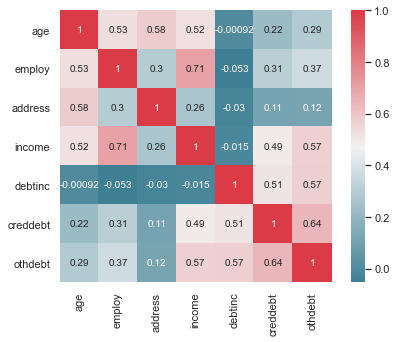

In [32]:
#Set the width and hieght of the correlation plot

f, ax = plt.subplots(figsize = (7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax , annot = True )

<AxesSubplot:>

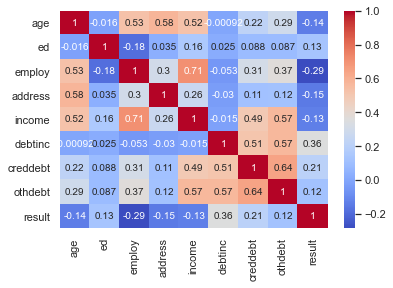

In [33]:

df_1 = bank.corr()
sns.heatmap(df_1 , annot = True , cmap = "coolwarm")

#### As u can see above in plot, no any variable is identical to other var, it means these vars are no hiighly correlated variables,  so we have to carry all variables and we will put all of them in model developement as all vars are imp right now.

In [34]:
bank['ed'].unique()

array([2.96064072, 1.        , 2.24554266, 2.        , 3.        ,
       4.        , 2.79827474, 1.97645001, 2.25922096, 2.38215714,
       1.72680475, 1.8126923 , 1.9645205 , 2.27977579, 1.32411487,
       3.10697651, 1.39366539, 1.75318272, 1.32647735, 1.97201906,
       2.6976684 , 5.        , 1.81890805, 2.35655901, 1.27382004,
       2.01090174, 1.94521205, 2.0093577 , 2.62380155, 1.53298316,
       1.28018361, 1.31112169, 1.32483921, 1.62666983, 1.86209418,
       1.32740931, 1.85469455, 1.90879037, 1.26029512, 1.76154984,
       2.33544809, 1.97650496, 1.60802394, 2.37331826, 1.59472773,
       1.2113529 , 2.1230242 , 1.32070963, 1.56469926, 2.09702113,
       1.32444713, 2.34431695, 1.24268178, 1.37444458, 1.78899958,
       1.86508575, 1.28881365, 1.5819134 ])

In [35]:
bank['result'].unique()

array([1., 0.])

In [36]:
bank['ed'] = pd.Categorical(bank['ed'])
print(bank.ed.dtype)

bank['result'] = pd.Categorical(bank['result'])
print(bank.result.dtype)

category
category


As we can see here both ed and result columns are categorical
so we perform chi 2 statistics to see the relation between them

In [37]:
cat_names = ["ed"]
from scipy.stats import chi2_contingency  # for chi-sqr test and comtingency table
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(bank['result'], bank[i]))
    print(p)

ed
0.586723187105507


As we can, see , p Value of cat var (ed) is > 0.05 , It means We Accept Null Hhypothesis saying that these two variables are , not imp to each other, n we can drop any one of them instead of carrying both same vars.

In [38]:
#  Now remove less important features  / Diamension reduction
from copy import deepcopy
bank = bank.drop(['ed'], axis=1)
bank.head(2)
bank_1=deepcopy(bank)

In [39]:
bank_1.head()


,age,employ,address,income,debtinc,creddebt,othdebt,result
0,32.356193,7.236156,2.601503,89.801565,9.3,11.359392,5.008608,1.0
1,27.000000,10.000000,6.000000,31.000000,17.3,1.362202,4.000798,0.0
2,40.000000,15.000000,14.000000,55.000000,5.5,0.856075,2.168925,0.0
3,45.812528,17.114644,16.862865,82.601082,2.9,2.658720,0.821280,0.0
4,24.000000,2.000000,0.000000,28.000000,17.3,1.787436,3.056564,1.0


# Feature Scaling 
## scale tht imp features in measurable units
### ___1) Scaling by Normalization
### __or_2) Scaling by Standardization

(array([ 28.,  51.,  88.,  89.,  72., 100.,  73.,  99.,  77.,  47.,  60.,
         30.,  18.,  13.,   5.]),
 array([20. , 22.4, 24.8, 27.2, 29.6, 32. , 34.4, 36.8, 39.2, 41.6, 44. ,
        46.4, 48.8, 51.2, 53.6, 56. ]),
 <BarContainer object of 15 artists>)

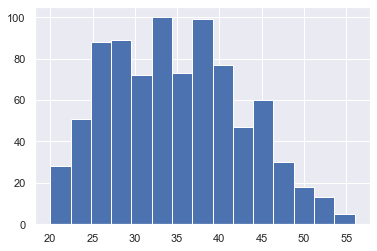

In [40]:
#check Normality by Histogram Before Normalization / Standerdization

%matplotlib inline  
plt.hist(bank['age'], bins='auto')

(array([ 93., 153., 146.,  79.,  80.,  57.,  43.,  32.,  36.,  25.,  25.,
         30.,  20.,  31.]),
 array([ 13.        ,  19.35714286,  25.71428571,  32.07142857,
         38.42857143,  44.78571429,  51.14285714,  57.5       ,
         63.85714286,  70.21428571,  76.57142857,  82.92857143,
         89.28571429,  95.64285714, 102.        ]),
 <BarContainer object of 14 artists>)

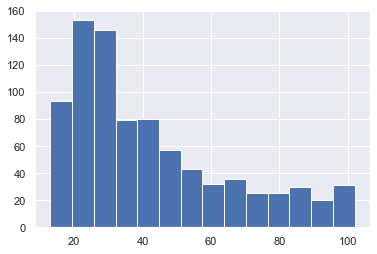

In [41]:
    # Again verify it
    
%matplotlib inline  
plt.hist(bank['income'], bins='auto')

 Since we can see that , data is not normallaly distributed , Hence go for **Normalization** 1st instead of Stdn

In [42]:
cnames

['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']

In [43]:
#Nomalisation

for i in cnames:
    print(i)
    bank[i] = (bank[i] - min(bank[i]))/(max(bank[i]) - min(bank[i]))

age
employ
address
income
debtinc
creddebt
othdebt


# Machine Learning Algorithms




In [44]:
from sklearn.metrics import accuracy_score

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
bank['result'] = bank['result'].astype('int64')#chaning dtype for result from float to int

In [47]:
bank.head(2)
print(bank.age)


0      0.343228
1      0.194444
2      0.555556
3      0.717015
4      0.111111
         ...   
845    0.388889
846    0.571003
847    0.777778
848    0.416667
849    0.472222
Name: age, Length: 850, dtype: float64


In [48]:
#Now divide the data into train and test

X= bank.values[:,0:7]     #saving all   var's in X
Y= bank.values[:,7]        #saving 1 dep var in Y

In [49]:
pd.DataFrame(X).head(2)

,0,1,2,3,4,5,6
0,0.343228,0.241205,0.083919,0.862939,0.223301,0.552210,0.141188
1,0.194444,0.333333,0.193548,0.202247,0.417476,0.065719,0.112518


In [50]:
#Now split the data into train and test
   #devided 80% and 20% of ALL var's obs (except 'default' var) in X_train and into X_test Respectively
   #devided 80% and 20% of Dep.Var's obs ( default var's) into y_train and into y_test Respectively

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=12)


In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
models=[]


from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
models.append(logre)

from sklearn.svm._classes import LinearSVC
lsvc=LinearSVC()
models.append(lsvc)

from sklearn.linear_model import LogisticRegressionCV
logrecv=LogisticRegressionCV()
models.append(logrecv)

from sklearn.svm import SVC
svc=SVC()
models.append(svc)

from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
models.append(sgd)

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
models.append(nb)

from sklearn.tree import  DecisionTreeClassifier
dt=DecisionTreeClassifier()
models.append(dt)

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
models.append(rf)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
models.append(knn)

In [53]:
from sklearn.model_selection import KFold,cross_val_score
cv=KFold(10)
mls=[]
scores=[]

for model in models:
  score=cross_val_score(model,X_train,y_train,cv=cv)
  print(str(model).split('(')[0]+' :- ',np.mean(score))
  mls.append(str(model).split('(')[0])
  scores.append(int(np.mean(score)*100))


LogisticRegression :-  0.8044117647058824
LinearSVC :-  0.8161764705882353
LogisticRegressionCV :-  0.8264705882352941
SVC :-  0.801470588235294
SGDClassifier :-  0.8147058823529412
GaussianNB :-  0.8117647058823529
DecisionTreeClassifier :-  0.7602941176470589
RandomForestClassifier :-  0.8088235294117647
KNeighborsClassifier :-  0.8014705882352942


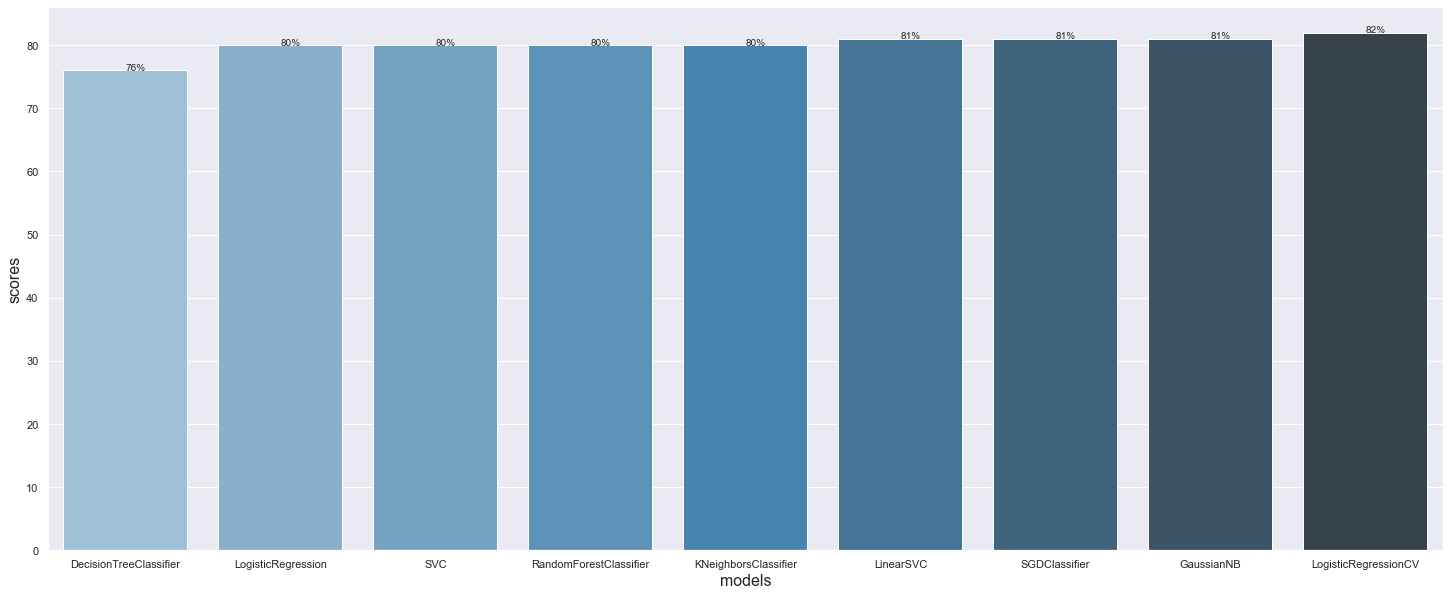

In [54]:
import matplotlib.pyplot as plt
ml_scores= pd.DataFrame({"models": mls,"scores": scores})
import seaborn as sns
ml_scores.sort_values('scores')

plt.figure(figsize=(25,10))
sns.barplot(x='models',y="scores",data=ml_scores,palette="Blues_d",order=ml_scores.sort_values('scores').models)


def addtext(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],str(y[i])+'%')
addtext(models,sorted(scores)) 
plt.xlabel("models",size=16)
plt.ylabel("scores", size=16)
plt.show()

In [55]:

for model in models:
  model.fit(X_train,y_train)
  print(model)
  print('Train Accuracy:-',accuracy_score(y_train,model.predict(X_train)))
  print('Test Accuracy:-',accuracy_score(y_test,model.predict(X_test)))
  print()

LogisticRegression()
Train Accuracy:- 0.8088235294117647
Test Accuracy:- 0.7705882352941177

LinearSVC()
Train Accuracy:- 0.8264705882352941
Test Accuracy:- 0.7647058823529411

LogisticRegressionCV()
Train Accuracy:- 0.8352941176470589
Test Accuracy:- 0.7529411764705882

SVC()
Train Accuracy:- 0.825
Test Accuracy:- 0.7823529411764706

SGDClassifier()
Train Accuracy:- 0.7588235294117647
Test Accuracy:- 0.7294117647058823

GaussianNB()
Train Accuracy:- 0.8132352941176471
Test Accuracy:- 0.7647058823529411

DecisionTreeClassifier()
Train Accuracy:- 1.0
Test Accuracy:- 0.7705882352941177

RandomForestClassifier()
Train Accuracy:- 1.0
Test Accuracy:- 0.7764705882352941

KNeighborsClassifier()
Train Accuracy:- 0.8529411764705882
Test Accuracy:- 0.7823529411764706



among all these alogirthms we choose Logistic Regression because of its train and test scores which is best fit

In [56]:
X_train[0]

array([0.38888889, 0.46666667, 0.25806452, 0.16853933, 0.41019417,
       0.05479149, 0.10175195])

In [57]:
cnames

['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']

In [59]:
import pickle
logre_model=pickle.load(open('C:/Users/saigo/Desktop/s/logre_model','rb'))



In [60]:
X_train[0]

array([0.38888889, 0.46666667, 0.25806452, 0.16853933, 0.41019417,
       0.05479149, 0.10175195])

In [61]:
user_input=np.array(X_train[0])

In [62]:
user_input=user_input.reshape(1,-1)

In [63]:
logre_model.predict(user_input)[0]

0.0

In [ ]:
y_train[0]

In [ ]:
pip install pywebio

In [ ]:
#import pickle
#saving ml model
#pickle.dump(logre,open('C:/Users/saigo/Desktop/s/logre_model','wb'))
#loading ml model
#logre_model=pickle.load(open('C:/Users/saigo/Desktop/s/logre_model','rb'))

In [ ]:
app=Flask(__name__)
logre_model=pickle.load(open('C:/Users/saigo/Desktop/s/logre_model','rb'))
#sample inputs
#[0.11111111, 0.1       , 0.16129032, 0.02247191, 0.27184466,0.00297762, 0.04484908] - y=1
def predict(): 
    user_input=[]
    ss_user_input=[]
    for i in cnames:
        x=input(i+' :- ',type=FLOAT)
        user_input.append(x)
        
    for i in range(len(user_input)):
        ss = (user_input[i] - min(user_input))/(max(user_input) - min(user_input))
        ss_user_input.append(ss)

    ss_user_input=np.array(ss_user_input)
    ss_user_input=ss_user_input.reshape(1,-1)
    
    prediction=logre_model.predict(ss_user_input)[0]
    if prediction==1.0:
        prediction='Yes'
    else:
        prediction='No'
    put_text('prediction = %r' % prediction)
        


app.add_url_rule('/','webio_view',webio_view(predict),methods=['GET','POST','OPTIONS'])
app.run(host='localhost',port=88)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://localhost:88/ (Press CTRL+C to quit)
127.0.0.1 - - [20/Jun/2022 10:24:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2022 10:24:14] "GET /?app=index HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2022 10:24:15] "GET /?app=index HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2022 10:24:17] "GET /?app=index HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2022 10:24:17] "POST /?app=index HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2022 10:24:18] "GET /?app=index HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2022 10:24:18] "POST /?app=index HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2022 10:24:19] "GET /?app=index HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2022 10:24:19] "GET /?app=index HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2022 10:24:20] "POST /?app=index HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2022 10:24:20] "GET /?app=index HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2022 10:24:22] "GET /?app=index HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2022 10:24:22] "POST /?app=index HTTP/1.1" 200 -
127.0.0.1 - - [20/Jun/2022 10:24:22] "

In [ ]:
X_train[1]

In [ ]:
y_train[0]

In [ ]:
sampleList = np.array(bank_1[:2])
sampleList

In [ ]:
bank_1.head()

In [ ]:
#[32.35619303,  7.23615625,  2.60150296, 89.80156532,  9.3       ,11.359392  ,  5.008608  ,       ] - ouput -1
#[27.        , 10.        ,  6.        , 31.        , 17.3       ,1.362202  ,  4.000798  ,      ]  -output -0 